<a href="https://colab.research.google.com/github/raghavmittal2/Final-Year-Project-2019-20/blob/master/Colab%20Notebooks/Fake_news_classification_Experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# train data contains articles from 2012 whereas test data contains articles
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import os

In [5]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [6]:
!mkdir drive
!google-drive-ocamlfuse drive
!ls drive/"Fake Newz"

 FakeNewsClassifier.ipynb	     mixed.csv		     stopwords.txt
'machine_learning fake news.ipynb'   mixed_real_fake.ipynb   train.csv


In [53]:
os.path.isfile("drive/Fake Newz/mixed.csv")

True

In [54]:
df = pd.read_csv("drive/Fake Newz/mixed.csv")
# label = 1 means faek news
df.head()

,label,text
0,1,"Hillary Clinton, the Most Corrupt Politician i..."
1,0,Democrats squawk over $690 million bridge With...
2,1,Chart Of The Day: Ratio Of Household Net Worth...
3,0,Wizards President Ernie Grunfeld not losing si...
4,0,"In Egypt and beyond, the power of a blue bra S..."


In [55]:
# balanced data
print(len(df[df['label']==1]))
print(len(df[df['label']==0]))

10413
10400


In [9]:
# TEXT PRE PROCESSING
import re
def pre_process(text):
    # lowercase
    text=text.lower()
    #remove tags
    text=re.sub("<!--?.*?-->","",text)
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    return text

df['text'] = df['text'].astype(str).apply(lambda x:pre_process(x))
 
#show the second 'text' just for fun
df['text']

0        hillary clinton the most corrupt politician in...
1        democrats squawk over million bridge with hous...
2        chart of the day ratio of household net worth ...
3        wizards president ernie grunfeld not losing si...
4        in egypt and beyond the power of a blue bra sa...
                               ...                        
20808    clinton s passive management approach is furth...
20809    komen foundation continues to see fallout from...
20810    hidden cam soros funded media matters brags ho...
20811    readers discuss diabetes parkinson s and billi...
20812    trump wins in historic anti establishment upri...
Name: text, Length: 20813, dtype: object

**TF-IDF FEATURES**

In [0]:
# STARTING TFIDF VECTORIZER
def get_stop_words(stop_file_path):
    """load stop words """
    
    with open(stop_file_path, 'r', encoding="utf-8") as f:
        stopwords = f.readlines()
        stop_set = set(m.strip() for m in stopwords)
        return frozenset(stop_set)
 
#load a set of stop words
stopwords=get_stop_words("drive/Fake Newz/stopwords.txt")
 

#eliminate stop words
vocab_size = 10000
cv=TfidfVectorizer(max_df=0.85,stop_words=stopwords, max_features=vocab_size, ngram_range=(1,3))

In [0]:
df_x = df['text']
df_y = df['label']

In [0]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0)

In [13]:
x_traincv = cv.fit_transform(x_train.values.astype('U'))

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['come', 'vis', 'viser', 'visest'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [14]:
# show bag of words vocab
cv.vocabulary_

{'nan': 5765,
 'wrote': 9875,
 'don': 2542,
 'hollywood': 4110,
 'legend': 5016,
 'hood': 4133,
 'who': 9686,
 'stole': 8481,
 'rich': 7566,
 'gave': 3643,
 'poor': 6661,
 'think': 8923,
 'opposed': 6150,
 'plan': 6568,
 'place': 6559,
 'maryland': 5381,
 'shore': 8046,
 'opposition': 6154,
 'obviously': 6046,
 'physical': 6510,
 'based': 729,
 'tag': 8744,
 'line': 5111,
 'financial': 3328,
 'gives': 3711,
 'take': 8747,
 'money': 5652,
 'state': 8415,
 'utility': 9372,
 'customer': 2079,
 'month': 5665,
 'fee': 3264,
 'fall': 3163,
 'heavily': 4001,
 'higher': 4053,
 'percentage': 6431,
 'income': 4349,
 'people': 6406,
 'manufacturing': 5337,
 'plants': 6580,
 'build': 1088,
 'machines': 5259,
 'jobs': 4683,
 'years': 9898,
 'compared': 1686,
 'lost': 5217,
 'economy': 2707,
 'real': 7190,
 'fictional': 3292,
 'mark': 5356,
 'gaithersburg': 3609,
 'people who': 6420,
 'happened': 3920,
 'changing': 1349,
 'world': 9833,
 'piece': 6528,
 'part': 6308,
 'ongoing': 6113,
 'leadership':

In [15]:
x_traincv

<16650x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 3329536 stored elements in Compressed Sparse Row format>

In [0]:
x_testcv = cv.transform(x_test.values.astype('U'))

In [0]:
# coverting sparse matrix to a dense matrix
a = x_traincv.toarray()

In [18]:
a.shape

(16650, 10000)

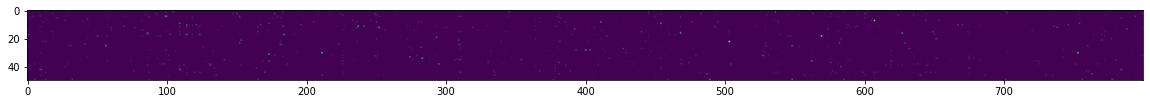

In [19]:
plt.figure(figsize = (20, 4))
_ = plt.imshow(a[50: 100, 200:1000])

**FEATURE IMPORTANCE**

In [0]:
features = cv.get_feature_names()

In [0]:
# function to get top n tfidf values in row and return them with their corresponding feature names.
def top_tfidf_feats(row, features, top_n=25):
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df_feat = pd.DataFrame(top_feats)
    df_feat.columns = ['feature', 'tfidf']
    return df_feat

In [0]:
# function to get top tfidf features in specific document (matrix row)
def top_feats_in_doc(x_tr, features, row_id, top_n):
  row = np.squeeze(x_tr[row_id].toarray())
  return top_tfidf_feats(row, features, top_n)

In [23]:
# top 25 features in 1000th train article
print(top_feats_in_doc(x_traincv, features, 1000, 25))

           feature     tfidf
0         lobbying  0.474240
1           google  0.411843
2          quarter  0.218228
3            group  0.207103
4          company  0.203615
5          million  0.183058
6        microsoft  0.156255
7   fourth quarter  0.142451
8       strategies  0.138251
9           search  0.108078
10        internet  0.103983
11          fourth  0.103100
12           spent  0.090102
13      crossroads  0.083665
14          piracy  0.083480
15      supplement  0.081128
16            late  0.081126
17          knight  0.080825
18         mirrors  0.080528
19           clerk  0.079955
20        backdrop  0.079140
21        fortunes  0.079140
22            akin  0.078006
23      chesapeake  0.077533
24         pursued  0.076527


In [0]:
# Return the top n features that on average are most important amongst documents in rows indentified by indices in grp_ids. 
def top_mean_feats(Xtr, features, grp_ids=None, min_tfidf=0.1, top_n=25):
    if grp_ids:
        D = Xtr[grp_ids].toarray()
    else:
        D = Xtr.toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

In [25]:
# top 25 most important features in the whole corpus 
print(top_mean_feats(x_traincv, features, grp_ids=None, min_tfidf=0.1, top_n=25))

            feature     tfidf
0               nan  0.030365
1             trump  0.023737
2           clinton  0.017385
3           hillary  0.012358
4            romney  0.009949
5             obama  0.008524
6               fbi  0.007004
7            russia  0.006970
8          election  0.005992
9                mr  0.005966
10              war  0.005445
11               de  0.004985
12           police  0.004959
13         gingrich  0.004709
14             game  0.004665
15         santorum  0.004565
16            syria  0.004491
17          russian  0.004428
18           school  0.004394
19         campaign  0.004283
20          percent  0.004259
21              www  0.004204
22           county  0.004166
23  hillary clinton  0.004115
24           emails  0.003830


In [0]:
# Return a list of dfs, where each df holds top_n features and their mean tfidf value calculated across documents with the same class label.
def top_feats_by_class(Xtr, y, features, min_tfidf=0.1, top_n=25):
   
    dfs = []
    labels = np.unique(y)
    for label in labels:
        ids = np.where(y==label)
        feats_df = top_mean_feats(Xtr, features, ids, min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)
    return dfs

In [0]:
# function to plot the tf idf feature importance of both classes
def plot_tfidf_classfeats_h(dfs):
    # Plot the data frames returned by the function plot_tfidf_classfeats()
    fig = plt.figure(figsize=(12, 9), facecolor="w")
    x = np.arange(len(dfs[0]))
    for i, df in enumerate(dfs):
        ax = fig.add_subplot(1, len(dfs), i+1)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_xlabel("Mean Tf-Idf Score", labelpad=16, fontsize=14)
        ax.set_title("label = " + str(df.label), fontsize=16)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df.tfidf, align='center', color='#F02491')
        ax.set_yticks(x)
        ax.set_ylim([-1, x[-1]+1])
        yticks = ax.set_yticklabels(df.feature)
        plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)
    plt.show()

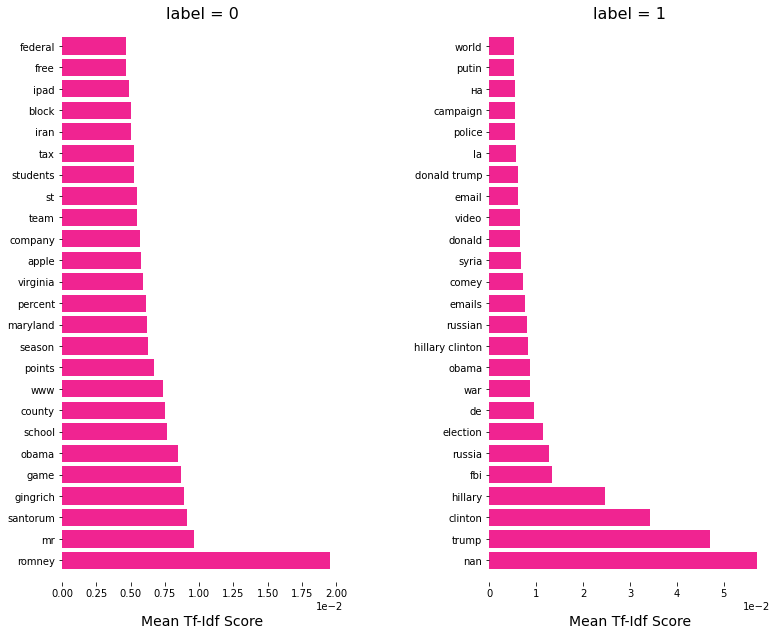

In [28]:
dfs = top_feats_by_class(x_traincv, y_train, features, min_tfidf=0.1, top_n= 25)    
plot_tfidf_classfeats_h(dfs)


**LOGISTIC REGRESSION MODEL**

In [0]:
# making the Logistic Regression Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(x_traincv, y_train)

In [0]:
# making predictions
pred = model.predict(x_testcv)

In [33]:
# pred humaara predicted result hai x_test ke oopar
pred

array([0, 0, 1, ..., 1, 1, 0])

In [0]:
# y_test mei stored hain x_test ki asli categories
actual_result = np.array(y_test)

In [35]:
actual_result

array([0, 0, 1, ..., 1, 1, 0])

In [36]:
count = 0
for i in range(len(pred)):
  if pred[i] == actual_result[i]:
    count = count + 1
# consoling out number of true positive predictions    
count    

4018

In [37]:
# total number of predictions
len(pred)

4163

CONFUSION MATRIX & CLASSIFICATION REPORT

In [40]:
import seaborn as sn
results = confusion_matrix(actual_result, pred)
print('Confusion Matrix: ')
print(results)
print('Accuracy Score: ', accuracy_score(actual_result, pred))
print('Report: ')
print(classification_report(actual_result, pred))
# precision is the percent of predicted yeses that are correct
# recall is the % of true yeses that were also predicted yes

Confusion Matrix: 
[[2025   61]
 [  84 1993]]
Accuracy Score:  0.9651693490271439
Report: 
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2086
           1       0.97      0.96      0.96      2077

    accuracy                           0.97      4163
   macro avg       0.97      0.97      0.97      4163
weighted avg       0.97      0.97      0.97      4163



Text(61.5, 0.5, 'Truth')

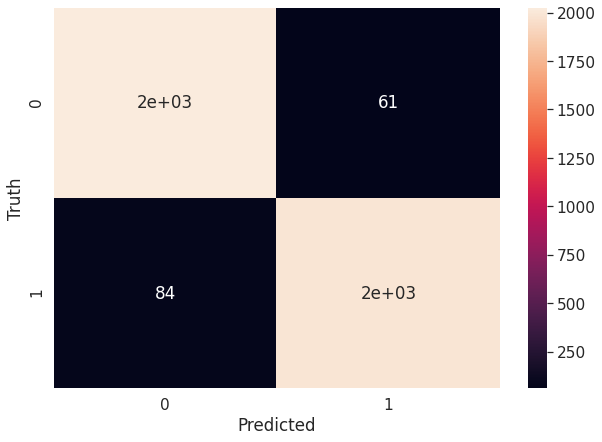

In [41]:
import seaborn as sn
plt.figure(figsize=(10, 7))
sn.heatmap(results, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [41]:
## Get Features names
feature_names = cv.get_feature_names()
model.coef_[0]

array([-10.04166695, -11.07423922,  -9.6773467 , ...,  -9.70602005,
        -8.72937121,  -9.10801676])

In [42]:
### Most real
sorted(zip(model.coef_[0], feature_names), reverse=True)[:20]

[(-5.257075453115679, 'trump'),
 (-5.418862458273283, 'clinton'),
 (-5.695065118112995, 'hillary'),
 (-6.108984478854346, 'people'),
 (-6.139482440740958, 'election'),
 (-6.157072275159236, 'who'),
 (-6.376015138979851, 'fbi'),
 (-6.392561716484485, 'russia'),
 (-6.455762234525068, 'just'),
 (-6.456754519795532, 'donald'),
 (-6.501459041081426, 'world'),
 (-6.504871321943651, 'like'),
 (-6.510781199205388, 'president'),
 (-6.525160846230568, 'new'),
 (-6.557599905181156, 'media'),
 (-6.562200483096397, 'now'),
 (-6.5788989575816865, 'war'),
 (-6.591883225177225, 'campaign'),
 (-6.620163477488483, 'state'),
 (-6.620818715383726, 'obama')]

In [45]:
### Most fake
sorted(zip(model.coef_[0], feature_names))[:5000]

[(-11.317869926553081, 'acc'),
 (-11.317869926553081, 'annandale'),
 (-11.317869926553081, 'artisphere'),
 (-11.317869926553081, 'ashburn'),
 (-11.317869926553081, 'bach'),
 (-11.317869926553081, 'backstrom'),
 (-11.317869926553081, 'beltsville'),
 (-11.317869926553081, 'blatche'),
 (-11.317869926553081, 'bluegrass'),
 (-11.317869926553081, 'brees'),
 (-11.317869926553081, 'bristow'),
 (-11.317869926553081, 'bulger'),
 (-11.317869926553081, 'calvert'),
 (-11.317869926553081, 'cavaliers'),
 (-11.317869926553081, 'centreville'),
 (-11.317869926553081, 'chinn'),
 (-11.317869926553081, 'clippers'),
 (-11.317869926553081, 'conrad'),
 (-11.317869926553081, 'cordray'),
 (-11.317869926553081, 'cuccinelli'),
 (-11.317869926553081, 'daisey'),
 (-11.317869926553081, 'defenseman'),
 (-11.317869926553081, 'dematha'),
 (-11.317869926553081, 'drath'),
 (-11.317869926553081, 'espnu'),
 (-11.317869926553081, 'ext'),
 (-11.317869926553081, 'fauquier'),
 (-11.317869926553081, 'frese'),
 (-11.317869926553

ROC AUC 

In [49]:
# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

probs = model.predict_proba(x_testcv)
probs = probs[:, 1]
print(probs)

[0.1050977  0.03352417 0.94159217 ... 0.93885878 0.96879843 0.38914911]


In [50]:
auc = roc_auc_score(y_test, probs)
auc 

0.9929419183118214

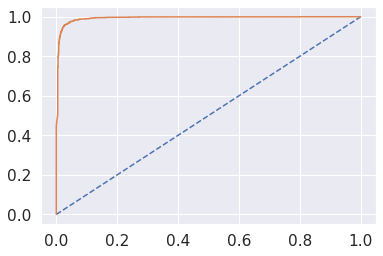

In [51]:
fpr, tpr, thresh = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)